# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import yfinance as yf
import warnings
warnings.simplefilter("ignore")
from datetime import date, timedelta

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use("dark_background")

# Downloading and saving the data of (Hdfc, Icici, Axis & SBI)

In [2]:
# Retrieve the current date and format it as the end date:
today = date.today()
end_date = today.strftime("%Y-%m-%d")

# Calculate the start date as 365 days before the end date:
start_date = (today - timedelta(days=365)).strftime("%Y-%m-%d")

# Create a dictionary of bank symbols and their corresponding names
bank_symbols = {'HDFCBANK.NS': 'HDFC Bank','ICICIBANK.NS': 'ICICI Bank','AXISBANK.NS': 'Axis Bank','SBIN.NS': 'State Bank of India'}

# Create empty dataframes to store the individual bank data
hdfc_df = pd.DataFrame()
icici_df = pd.DataFrame()
axis_df = pd.DataFrame()
sbi_df = pd.DataFrame()

# Loop through the bank symbols and download the data for each bank:
for symbol, bank_name in bank_symbols.items():
    data = yf.download(symbol, start=start_date, end=end_date, progress=False)
    data['Bank'] = bank_name
    
    if bank_name == 'HDFC Bank':
        hdfc_df = data
    elif bank_name == 'ICICI Bank':
        icici_df = data
    elif bank_name == 'Axis Bank':
        axis_df = data
    elif bank_name == 'State Bank of India':
        sbi_df = data

# Print the last few rows of each bank's DataFrame
print("HDFC Bank:")
print(hdfc_df.tail())
print()

print("ICICI Bank:")
print(icici_df.tail())
print()

print("Axis Bank:")
print(axis_df.tail())
print()

print("State Bank of India:")
print(sbi_df.tail())
print()


HDFC Bank:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-05-05  1639.000000  1660.949951  1622.099976  1625.650024  1625.650024   
2023-05-08  1635.000000  1650.349976  1630.000000  1644.449951  1644.449951   
2023-05-09  1649.900024  1656.000000  1639.949951  1644.500000  1644.500000   
2023-05-10  1644.500000  1654.650024  1633.099976  1652.099976  1652.099976   
2023-05-11  1665.150024  1688.000000  1649.250000  1653.199951  1653.199951   

              Volume       Bank  
Date                             
2023-05-05  31385208  HDFC Bank  
2023-05-08  18622262  HDFC Bank  
2023-05-09  21844469  HDFC Bank  
2023-05-10  23170275  HDFC Bank  
2023-05-11  17867309  HDFC Bank  

ICICI Bank:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-05  925.000000  942.450012  

# Making a function to plot candlestick with Volume traded

In [3]:
def plot_candlestick(data, bank_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

    # Candlestick chart
    fig.add_trace(go.Candlestick(x=data.index,open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'],
                                 name='Candlestick'), row=1, col=1
    )

    # Volume chart
    fig.add_trace(go.Scatter(x=data.index,y=data['Volume'],name='Volume',fill='tozeroy',line=dict(color='green')),row=2, col=1
    )

    fig.update_layout(
        title=f"{bank_name} Candlestick and Volume Chart",
        xaxis_title="Date",
        template="plotly_dark"
    )

    fig.show()

# Making a function that will let us introduce Simple Moving Averages

In [4]:
def add_moving_averages(data, window_sizes=[10, 20, 50]):
    for window in window_sizes:
        column_name = f'MA{window}'
        data[column_name] = data['Adj Close'].rolling(window=window).mean()
    return data

# HDFC BANK

In [5]:
plot_candlestick(hdfc_df,"HDFC Bank")

In [6]:
add_moving_averages(hdfc_df)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-05-12  1321.099976  1326.800049  1293.000000  1303.050049  1303.050049   
2022-05-13  1310.050049  1318.000000  1287.000000  1291.349976  1291.349976   
2022-05-16  1299.000000  1312.000000  1285.300049  1305.099976  1305.099976   
2022-05-17  1312.599976  1317.000000  1298.199951  1314.000000  1314.000000   
2022-05-18  1324.050049  1333.300049  1310.000000  1313.900024  1313.900024   
...                 ...          ...          ...          ...          ...   
2023-05-05  1639.000000  1660.949951  1622.099976  1625.650024  1625.650024   
2023-05-08  1635.000000  1650.349976  1630.000000  1644.449951  1644.449951   
2023-05-09  1649.900024  1656.000000  1639.949951  1644.500000  1644.500000   
2023-05-10  1644.500000  1654.650024  1633.099976  1652.099976  1652.099976   
2023-05-11  1665.150024  1688.000000  1649.250000  1653.199951  1653.199951   

              Volume       Bank         MA10         MA20         MA50  
Date                                                                    
2022-05-12  11191145  HDFC Bank          NaN          NaN          NaN  
2022-05-13   8384119  HDFC Bank          NaN          NaN          NaN  
2022-05-16   4902178  HDFC Bank          NaN          NaN          NaN  
2022-05-17   8320722  HDFC Bank          NaN          NaN          NaN  
2022-05-18   7866192  HDFC Bank          NaN          NaN          NaN  
...              ...        ...          ...          ...          ...  
2023-05-05  31385208  HDFC Bank  1680.115015  1674.210004  1625.943005  
2023-05-08  18622262  HDFC Bank  1677.100012  1673.745001  1625.714004  
2023-05-09  21844469  HDFC Bank  1672.735010  1672.652502  1625.797004  
2023-05-10  23170275  HDFC Bank  1671.530005  1672.335004  1625.909004  
2023-05-11  17867309  HDFC Bank  1669.669995  1671.829999  1626.689004  

[248 rows x 10 columns]

Text(0.5, 1.0, "HDFC BANK with MA's")

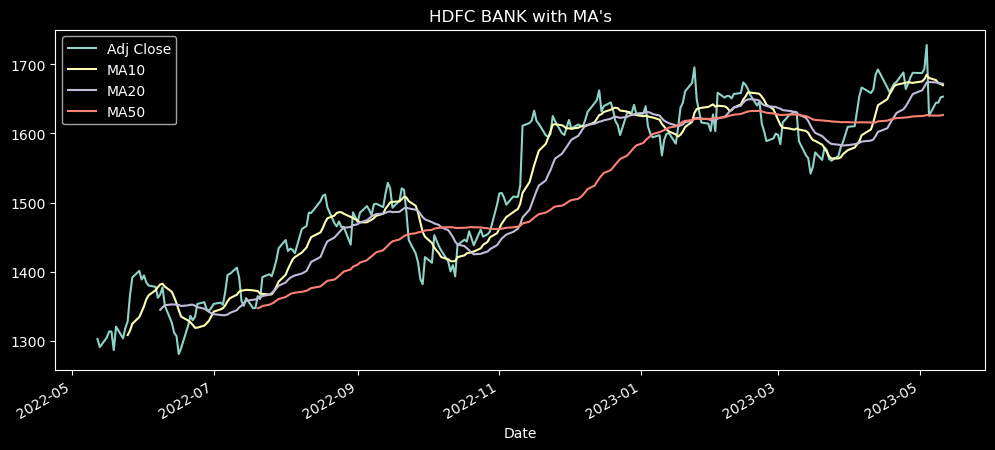

In [45]:
hdfc_df[['Adj Close','MA10','MA20','MA50']].plot(subplots=False,figsize=(12,5))
plt.title("HDFC BANK with MA's")

<AxesSubplot:xlabel='Date'>

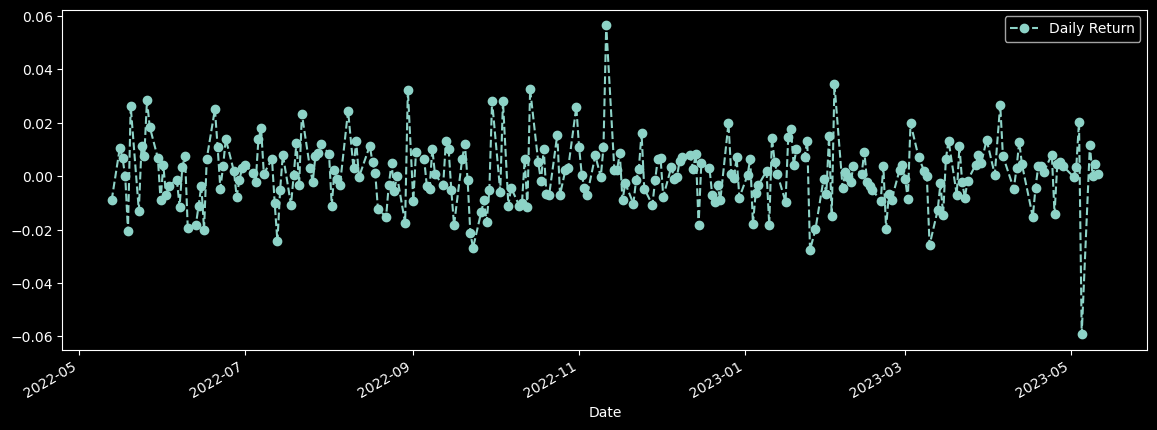

In [8]:
hdfc_df['Daily Return'] = hdfc_df['Adj Close'].pct_change()

#Plotting the daily return
hdfc_df['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

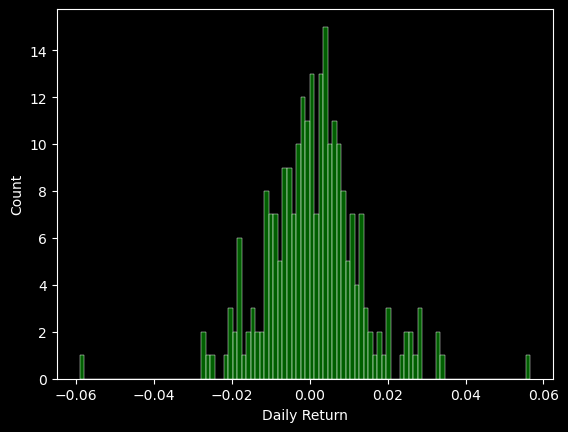

In [9]:
sns.histplot(x=hdfc_df['Daily Return'].dropna(),bins=100,color='green')

# ICICI BANK

In [10]:
plot_candlestick(icici_df,"ICICI Bank")

In [11]:
add_moving_averages(icici_df)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-12  707.549988  710.700012  693.299988  695.799988  691.649414   
2022-05-13  702.400024  702.400024  675.000000  677.349976  673.309448   
2022-05-16  676.700012  690.950012  675.750000  683.000000  678.925781   
2022-05-17  686.099976  712.000000  685.150024  710.000000  705.764709   
2022-05-18  712.349976  717.000000  706.099976  707.349976  703.130493   
...                ...         ...         ...         ...         ...   
2023-05-05  925.000000  942.450012  923.450012  926.950012  926.950012   
2023-05-08  927.000000  941.700012  927.000000  937.900024  937.900024   
2023-05-09  941.000000  945.000000  931.799988  934.400024  934.400024   
2023-05-10  934.599976  941.000000  928.250000  936.049988  936.049988   
2023-05-11  940.049988  947.000000  933.849976  939.200012  939.200012   

              Volume        Bank        MA10        MA20        MA50  
Date                                                                  
2022-05-12  16685166  ICICI Bank         NaN         NaN         NaN  
2022-05-13  15717043  ICICI Bank         NaN         NaN         NaN  
2022-05-16   9025623  ICICI Bank         NaN         NaN         NaN  
2022-05-17  12765052  ICICI Bank         NaN         NaN         NaN  
2022-05-18  11835013  ICICI Bank         NaN         NaN         NaN  
...              ...         ...         ...         ...         ...  
2023-05-05  19002035  ICICI Bank  914.840002  901.597504  871.307004  
2023-05-08  18623913  ICICI Bank  920.065002  904.262506  872.812004  
2023-05-09  21507610  ICICI Bank  923.030005  907.232507  874.458005  
2023-05-10  25910923  ICICI Bank  925.290002  910.612506  876.095005  
2023-05-11  20027372  ICICI Bank  927.715002  913.477505  878.094005  

[248 rows x 10 columns]

Text(0.5, 1.0, "ICICI BANK with MA's")

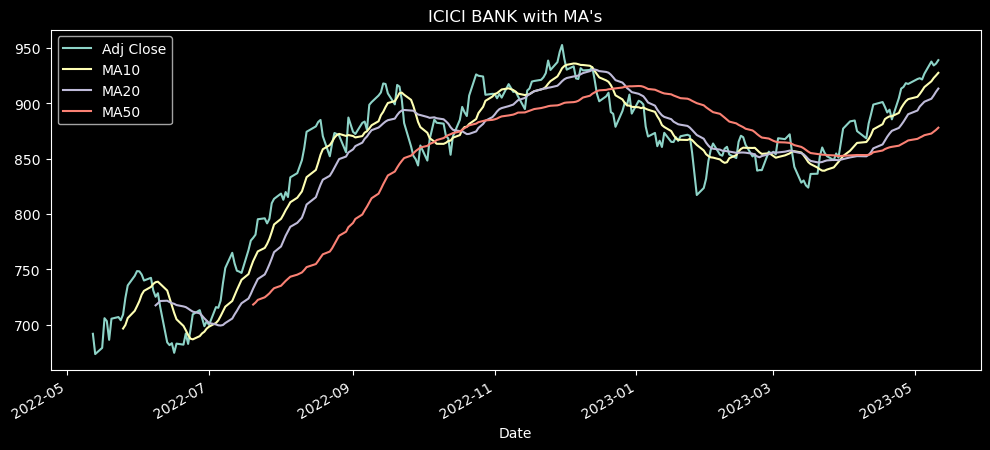

In [46]:
icici_df[['Adj Close','MA10','MA20','MA50']].plot(subplots=False,figsize=(12,5))
plt.title("ICICI BANK with MA's")

<AxesSubplot:xlabel='Date'>

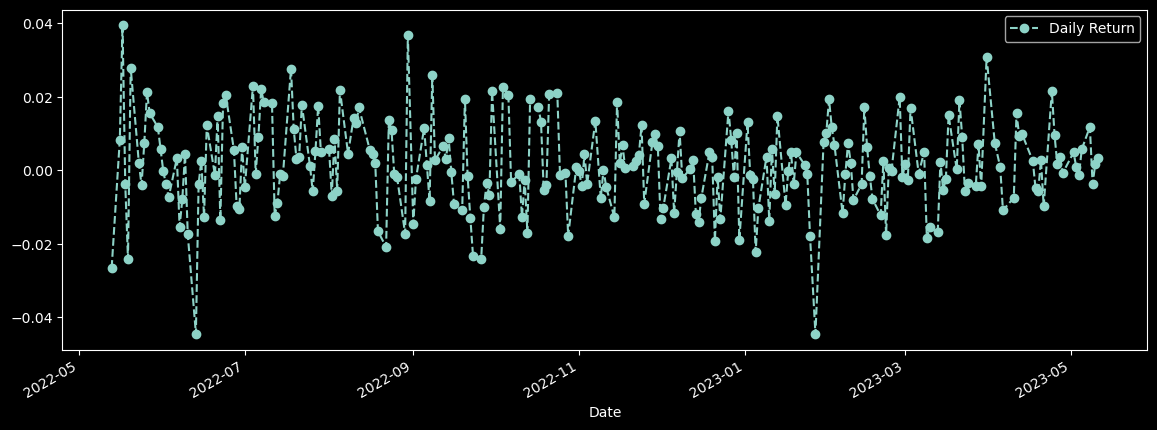

In [13]:
icici_df['Daily Return'] = icici_df['Adj Close'].pct_change()

#Plotting the daily return
icici_df['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

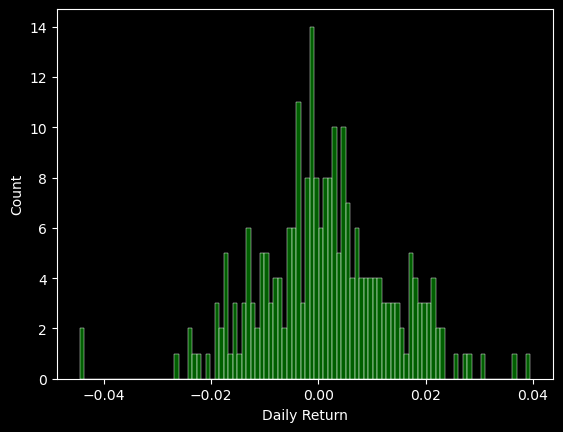

In [14]:
sns.histplot(x=icici_df['Daily Return'].dropna(),bins=100,color='green')

# AXIS BANK

In [15]:
plot_candlestick(axis_df,"AXIS Bank")

In [16]:
add_moving_averages(axis_df)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-12  667.000000  667.000000  644.000000  649.650024  648.662659   
2022-05-13  656.400024  659.400024  633.400024  635.950012  634.983459   
2022-05-16  639.849976  649.200012  630.049988  638.950012  637.978882   
2022-05-17  642.900024  657.500000  641.150024  654.950012  653.954590   
2022-05-18  654.750000  670.400024  650.299988  659.450012  658.447754   
...                ...         ...         ...         ...         ...   
2023-05-05  867.150024  885.000000  862.750000  865.299988  865.299988   
2023-05-08  865.299988  881.400024  865.299988  878.450012  878.450012   
2023-05-09  882.200012  890.200012  880.000000  888.250000  888.250000   
2023-05-10  892.000000  892.500000  877.549988  889.900024  889.900024   
2023-05-11  891.000000  900.000000  889.000000  895.950012  895.950012   

              Volume       Bank        MA10        MA20        MA50  
Date                                                                 
2022-05-12  11166084  Axis Bank         NaN         NaN         NaN  
2022-05-13   9618627  Axis Bank         NaN         NaN         NaN  
2022-05-16   6159695  Axis Bank         NaN         NaN         NaN  
2022-05-17   8152237  Axis Bank         NaN         NaN         NaN  
2022-05-18  13013873  Axis Bank         NaN         NaN         NaN  
...              ...        ...         ...         ...         ...  
2023-05-05  14343308  Axis Bank  871.565002  865.709998  854.220997  
2023-05-08   7007882  Axis Bank  872.990002  866.607498  854.691997  
2023-05-09  12117151  Axis Bank  873.585004  868.422498  855.521997  
2023-05-10  11893027  Axis Bank  874.740009  870.550000  856.438998  
2023-05-11  13816121  Axis Bank  875.570007  872.682501  857.690999  

[248 rows x 10 columns]

Text(0.5, 1.0, "AXIS BANK with MA's")

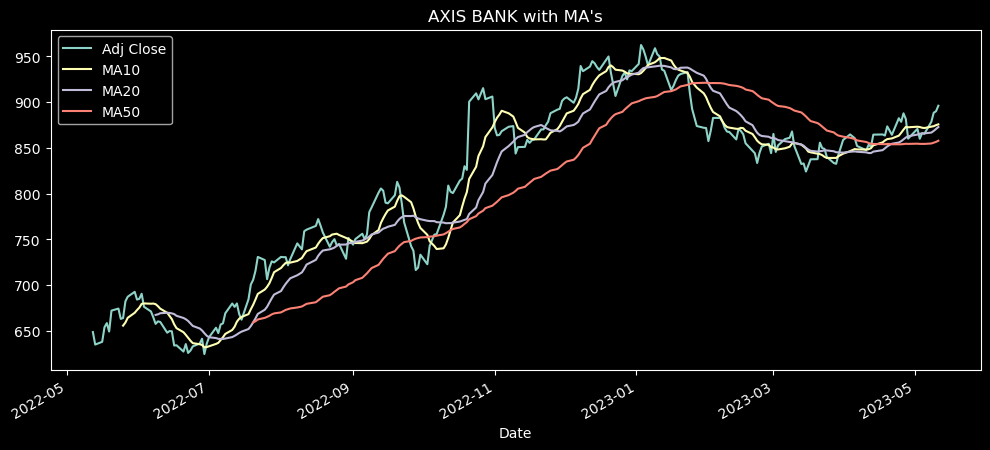

In [47]:
axis_df[['Adj Close','MA10','MA20','MA50']].plot(subplots=False,figsize=(12,5))
plt.title("AXIS BANK with MA's")

<AxesSubplot:xlabel='Date'>

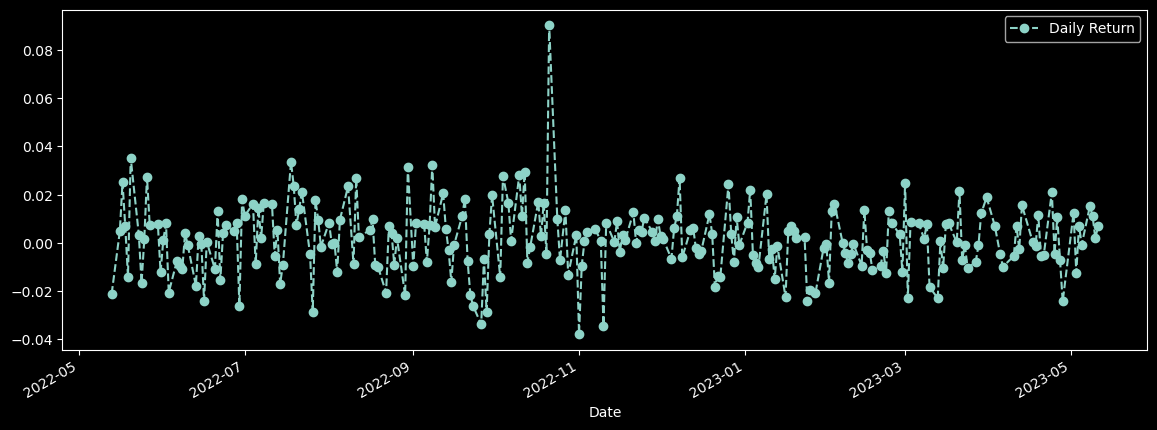

In [18]:
axis_df['Daily Return'] = axis_df['Adj Close'].pct_change()

#Plotting the daily return
axis_df['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

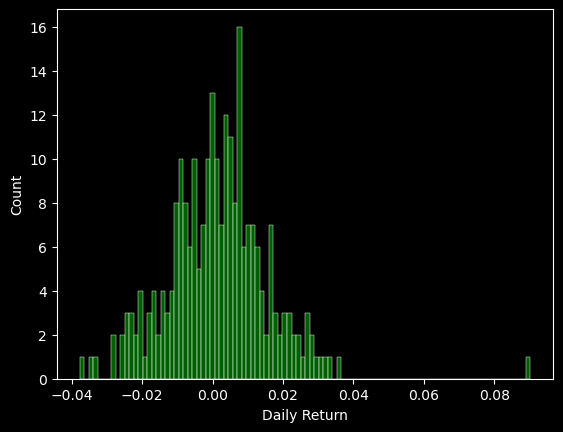

In [19]:
sns.histplot(x=axis_df['Daily Return'].dropna(),bins=100,color='green')

# SBI

In [20]:
plot_candlestick(sbi_df,"State Bank of India")

In [21]:
add_moving_averages(sbi_df)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-12  473.000000  473.000000  456.350006  462.649994  455.540771   
2022-05-13  469.450012  477.000000  439.750000  444.649994  437.817352   
2022-05-16  445.000000  461.500000  438.850006  455.000000  448.008331   
2022-05-17  458.299988  469.649994  456.149994  467.299988  460.119324   
2022-05-18  467.899994  468.600006  457.100006  458.000000  450.962219   
...                ...         ...         ...         ...         ...   
2023-05-05  580.200012  588.250000  575.049988  576.500000  576.500000   
2023-05-08  577.650024  587.599976  577.349976  583.599976  583.599976   
2023-05-09  585.000000  586.450012  572.099976  573.500000  573.500000   
2023-05-10  575.000000  575.000000  563.250000  572.200012  572.200012   
2023-05-11  572.200012  580.000000  572.000000  573.450012  573.450012   

              Volume                 Bank        MA10        MA20        MA50  
Date                                                                           
2022-05-12  18947096  State Bank of India         NaN         NaN         NaN  
2022-05-13  61403008  State Bank of India         NaN         NaN         NaN  
2022-05-16  27940958  State Bank of India         NaN         NaN         NaN  
2022-05-17  16880698  State Bank of India         NaN         NaN         NaN  
2022-05-18  15644497  State Bank of India         NaN         NaN         NaN  
...              ...                  ...         ...         ...         ...  
2023-05-05  18163461  State Bank of India  567.124994  550.819995  537.249998  
2023-05-08  12990869  State Bank of India  571.169989  553.849994  538.301998  
2023-05-09  18959065  State Bank of India  573.059991  556.142493  539.268997  
2023-05-10  18561315  State Bank of India  574.099994  558.437494  540.243997  
2023-05-11  16016715  State Bank of India  574.809998  560.504996  541.385998  

[248 rows x 10 columns]

Text(0.5, 1.0, "SBI BANK with MA's")

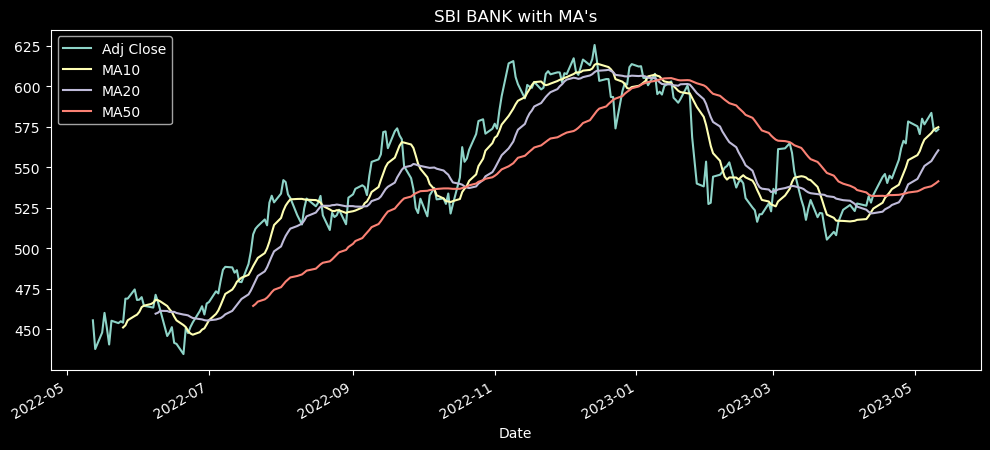

In [48]:
sbi_df[['Adj Close','MA10','MA20','MA50']].plot(subplots=False,figsize=(12,5))
plt.title("SBI BANK with MA's")

<AxesSubplot:xlabel='Date'>

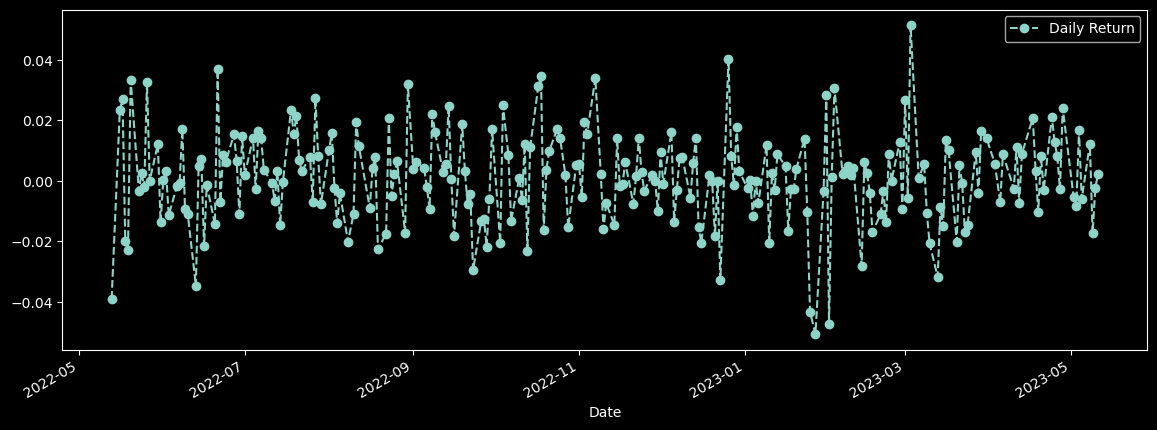

In [23]:
sbi_df['Daily Return'] = sbi_df['Adj Close'].pct_change()

#Plotting the daily return
sbi_df['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

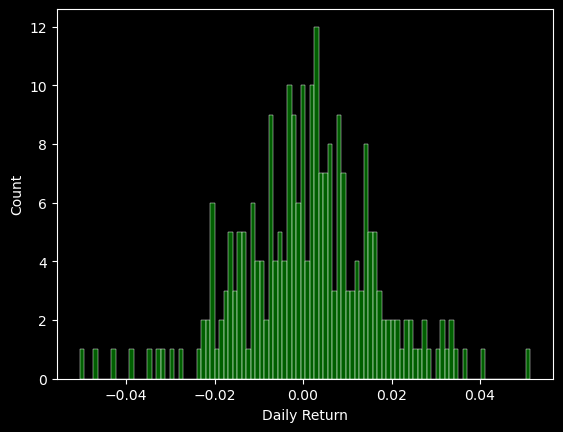

In [24]:
sns.histplot(x=sbi_df['Daily Return'].dropna(),bins=100,color='green')

# Pairplotting all the banks

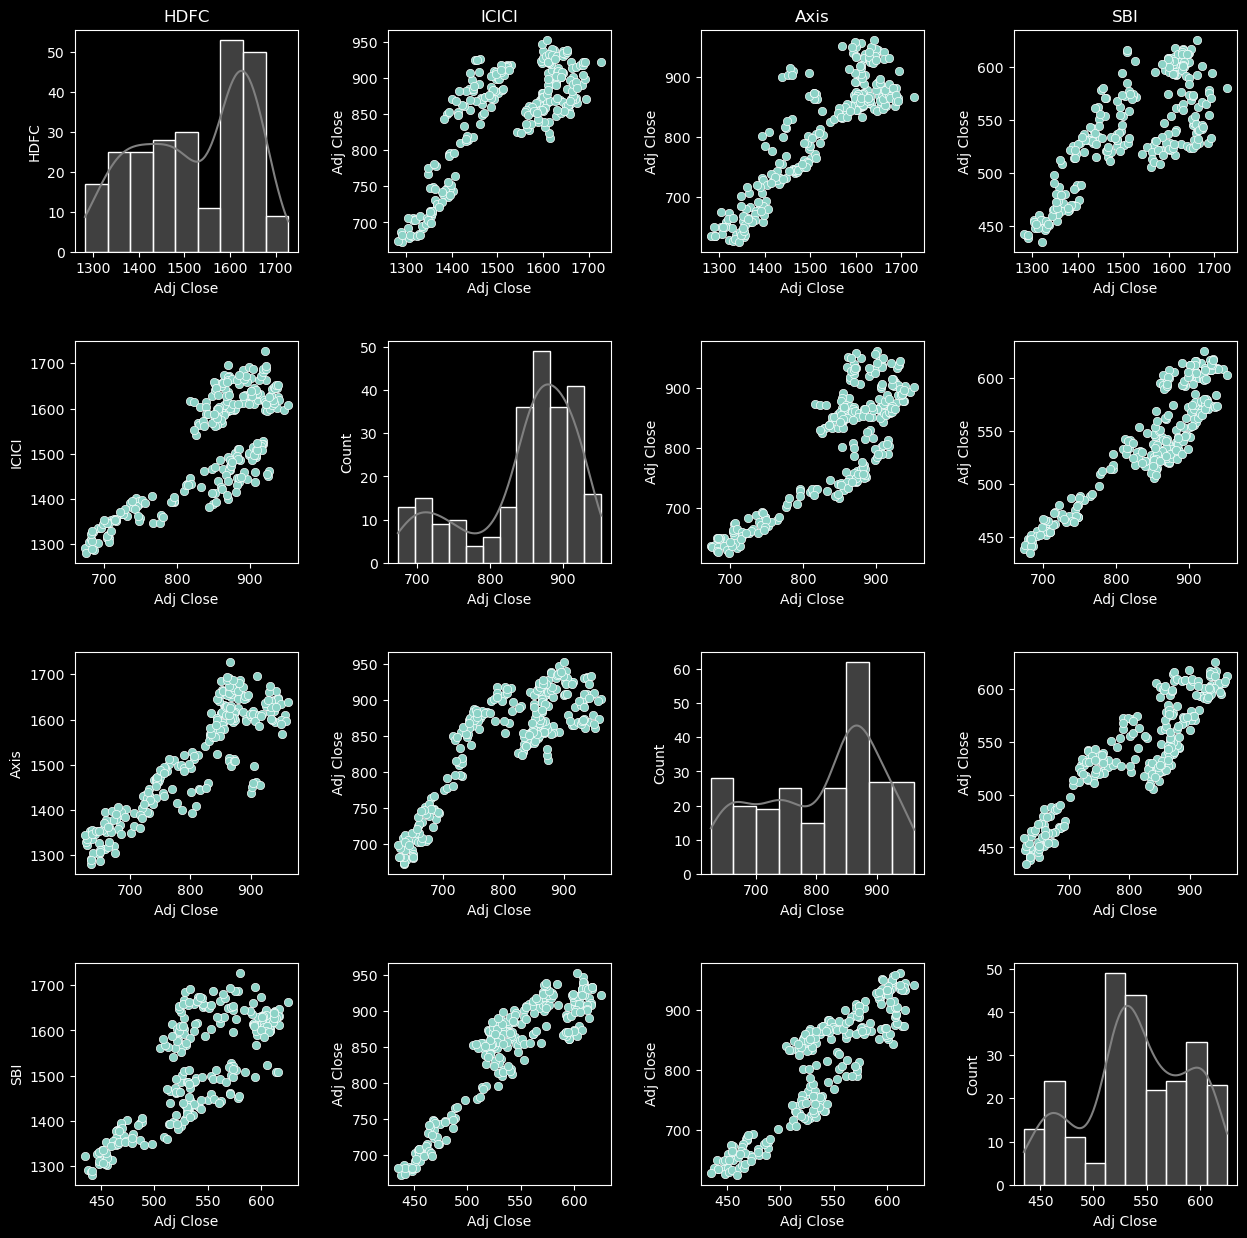

In [25]:
# List of bank dataframes
bank_dfs = [hdfc_df, icici_df, axis_df, sbi_df]
bank_names = ['HDFC', 'ICICI', 'Axis', 'SBI']

# Create subplots
fig, axes = plt.subplots(len(bank_dfs), len(bank_dfs), figsize=(15, 15))

# Iterate over bank combinations and plot scatter plots
for i in range(len(bank_dfs)):
    for j in range(len(bank_dfs)):
        if i == j:
            # Diagonal plots (histograms or KDEs)
            sns.histplot(bank_dfs[i]['Adj Close'], ax=axes[i, j], color='gray', kde=True)
        else:
            # Scatter plots
            sns.scatterplot(x=bank_dfs[i]['Adj Close'], y=bank_dfs[j]['Adj Close'], ax=axes[i, j])
        
        # Set axis labels and titles
        if i == 0:
            axes[i, j].set_title(bank_names[j])
        if j == 0:
            axes[i, j].set_ylabel(bank_names[i])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)


In [26]:
# Concatenate the 'Close' columns of the four dataframes
combined_df = pd.concat([hdfc_df['Close'], icici_df['Close'], axis_df['Close'], sbi_df['Close']], axis=1)

# Rename the columns
combined_df.columns = ['HDFC Close', 'ICICI Close', 'Axis Close', 'SBI Close']

# Create the 'Date' column
# combined_df['Date'] = hdfc_df.index

# Display the combined dataframe
combined_df

HDFC Close  ICICI Close  Axis Close   SBI Close
Date                                                        
2022-05-12  1303.050049   695.799988  649.650024  462.649994
2022-05-13  1291.349976   677.349976  635.950012  444.649994
2022-05-16  1305.099976   683.000000  638.950012  455.000000
2022-05-17  1314.000000   710.000000  654.950012  467.299988
2022-05-18  1313.900024   707.349976  659.450012  458.000000
...                 ...          ...         ...         ...
2023-05-05  1625.650024   926.950012  865.299988  576.500000
2023-05-08  1644.449951   937.900024  878.450012  583.599976
2023-05-09  1644.500000   934.400024  888.250000  573.500000
2023-05-10  1652.099976   936.049988  889.900024  572.200012
2023-05-11  1653.199951   939.200012  895.950012  573.450012

[248 rows x 4 columns]

In [27]:
combined_chg = combined_df.pct_change()

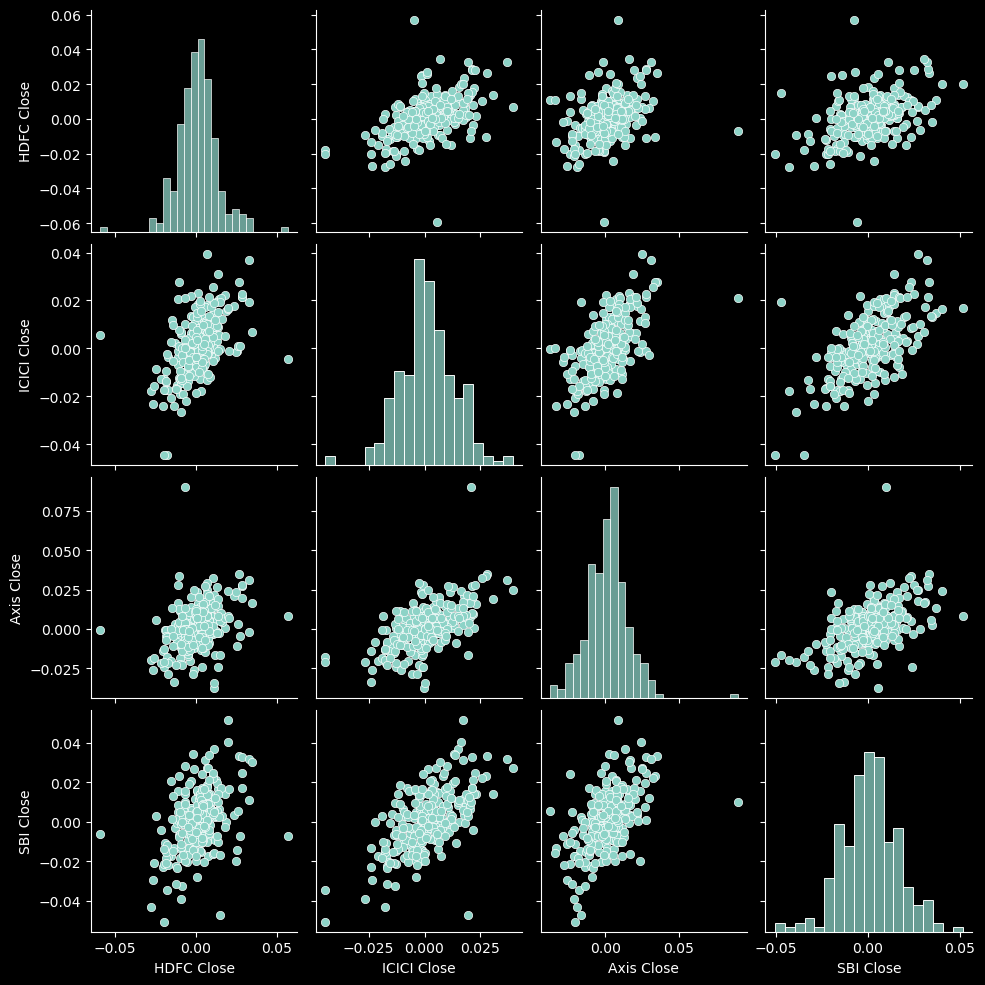

In [28]:
sns.pairplot(combined_chg.dropna())

 ### How much value do we put at risk by investing in a particular stock?
#### A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [29]:
df = combined_chg.dropna()

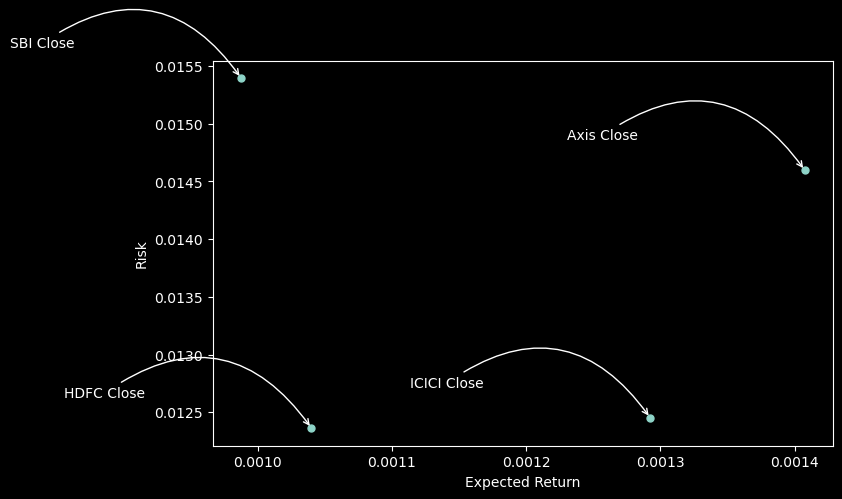

In [30]:
plt.figure(figsize=(8,5))

plt.scatter(df.mean(),df.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(df.columns,df.mean(),df.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

We'd want a stock to have a high expected return and a low risk; ICICI safest option for that. Meanwhile, SBI is high risk, AXIS is high risk and high return, HDFC is low risk and low return.

In [31]:
df.head()

HDFC Close  ICICI Close  Axis Close  SBI Close
Date                                                      
2022-05-13   -0.008979    -0.026516   -0.021088  -0.038906
2022-05-16    0.010648     0.008341    0.004717   0.023277
2022-05-17    0.006819     0.039531    0.025041   0.027033
2022-05-18   -0.000076    -0.003732    0.006871  -0.019902
2022-05-19   -0.020435    -0.024104   -0.014027  -0.022926

# Value at Risk
We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. 

## Bootstrap Method
We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

In [33]:
for col in df:
    res = df[col].quantile(0.05)
    print(col,":",res)

HDFC Close : -0.018306519242597165
ICICI Close : -0.017670868138194695
Axis Close : -0.02226060077586084
SBI Close : -0.02168096287829132


In [49]:
# According to the 0.05 empirical quantile of daily returns. This means that with 95% confidence, 

### The worst daily loss will not exceed 
#### 1.83% for HDFC Bank
#### 1.76% for ICICI Bank
#### 2.2% for Axis Bank
#### 2.1% for SBI 

In [44]:
for col in df:
    res = df[col].quantile(0.95)
    print(col,":",res)

HDFC Close : 0.022472353116606437
ICICI Close : 0.021199508266899113
Axis Close : 0.02476955354026437
SBI Close : 0.02689935389969615


In [51]:
# According to the 0.05 empirical quantile of daily returns. This means that with 95% confidence, 

### The best daily gain will not exceed 
#### 2.24% for HDFC Bank
#### 2.11% for ICICI Bank
#### 2.47% for Axis Bank
#### 2.68% for SBI 

# How can we attempt to predict future stock behaviour?

## Monte Carlo Method

### In this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [52]:
days = 365

#delta t
dt = 1/365

mu = df.mean()['ICICI Close']

sigma = df.std()['ICICI Close']

In [53]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [54]:
icici_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-12  707.549988  710.700012  693.299988  695.799988  691.649414   
2022-05-13  702.400024  702.400024  675.000000  677.349976  673.309448   
2022-05-16  676.700012  690.950012  675.750000  683.000000  678.925781   
2022-05-17  686.099976  712.000000  685.150024  710.000000  705.764709   
2022-05-18  712.349976  717.000000  706.099976  707.349976  703.130493   

              Volume        Bank  MA10  MA20  MA50  Daily Return  
Date                                                              
2022-05-12  16685166  ICICI Bank   NaN   NaN   NaN           NaN  
2022-05-13  15717043  ICICI Bank   NaN   NaN   NaN     -0.026516  
2022-05-16   9025623  ICICI Bank   NaN   NaN   NaN      0.008341  
2022-05-17  12765052  ICICI Bank   NaN   NaN   NaN      0.039531  
2022-05-18  11835013  ICICI Bank   NaN   NaN   NaN     -0.003732

Text(0.5, 1.0, 'Monte Carlo Analysis for ICICI Bank')

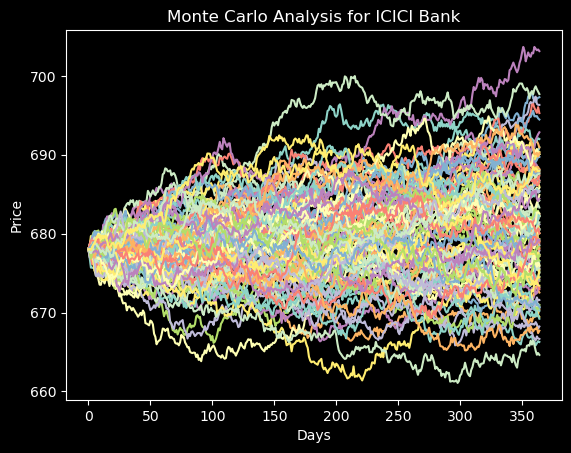

In [56]:
start_price = 678 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for ICICI Bank')

In [57]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for ICICI Bank Stock after 365 days')

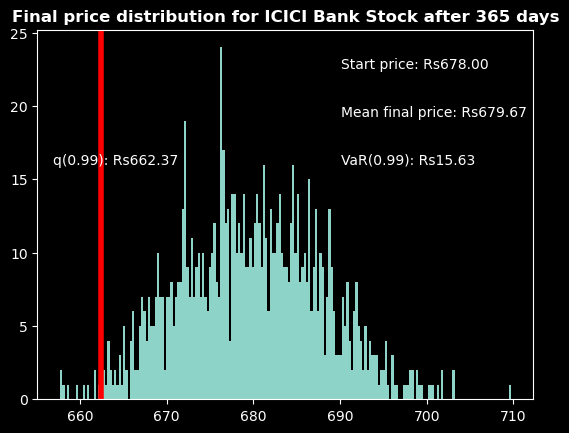

In [58]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: Rs%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: Rs%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): Rs%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): Rs%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for ICICI Bank Stock after %s days" %days, weight='bold')